# Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
## k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
## Train-test split
from sklearn.model_selection import train_test_split
## Accuracy
from sklearn.metrics import accuracy_score
## Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
## chi2_contingency

In [2]:
from google.colab import drive
## Mount my Google Drive
drive.mount('/content/gdrive')

## file path for my Google Drive account
file_path = "/content/gdrive/My Drive/Colab Notebooks/"
## Import the data as a dataframe
nba_data = pd.read_csv(file_path + 'current_nba_players (3).csv')

Mounted at /content/gdrive


In [3]:
## name any relevant columns
name= nba_data["name"]
height = nba_data["height_feet"]
weight = nba_data["weight_lbs"]
overall = nba_data["overall"]
three = nba_data["three_point_shot"]
total_attributes = nba_data["total_attributes"]
posistion = nba_data["position_1"]
offensive_consistency = nba_data['offensive_consistency']
overall = nba_data['overall']

In [5]:
# Fill NaN values with 0
nba_data.fillna(0, inplace=True)

In [6]:
# Get a list of numerical column names
numerical_cols = nba_data.select_dtypes(include=np.number).columns
# Drop all columns that are not in the numerical_cols list
nba_data = nba_data[numerical_cols]
# Display or further process the DataFrame with only numerical columns
nba_data

,Unnamed: 0,jersey,height_cm,weight_lbs,weight_kg,wingspan_cm,season_salary,years_in_the_nba,overall,group_outside_scoring,...,block,help_defense_iq,pass_perception,defensive_consistency,group_rebounding,offensive_rebound,defensive_rebound,intangibles,potential,total_attributes
0,0,32.0,203,235,106,213,22841455.0,11.0,85,82,...,47,84,82,80,73,75,70,75,85,2838
1,1,0.0,183,185,83,203,4668000.0,7.0,74,83,...,35,67,69,45,36,25,46,60,76,2349
2,2,23.0,196,215,97,208,11000000.0,5.0,79,80,...,53,76,57,75,54,42,66,40,79,2492
3,3,21.0,196,190,86,208,10514017.0,4.0,79,79,...,56,57,52,55,56,56,56,80,79,2476
4,4,14.0,191,180,81,196,0.0,2.0,67,72,...,30,52,50,40,35,32,37,80,71,2175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,521,14.0,226,305,137,241,5756880.0,1.0,79,68,...,83,70,67,65,82,88,75,85,85,2470
522,522,8.0,196,200,90,203,43031940.0,11.0,85,82,...,52,68,69,65,46,29,63,50,87,2727
523,523,22.0,206,240,108,218,8888889.0,5.0,72,63,...,87,57,42,45,68,80,55,45,78,2361
524,524,1.0,206,185,83,208,6133005.0,4.0,76,69,...,58,70,71,65,66,55,76,60,82,2503


# Analysis

In [5]:
## view the dataset
nba_data

,Unnamed: 0,name,nationality_1,nationality_2,team,jersey,position_1,position_2,archetype,height_feet,...,badge_off_ball_pest,badge_on_ball_menace,badge_paint_patroller,badge_pick_dodger,badge_post_lockdown,badge_boxout_beast,badge_rebound_chaser,badge_brick_wall,badge_slippery_off_ball,badge_pogo_stick
0,0,Aaron Gordon,United States,0,Denver Nuggets,32.0,PF,0,2-Way Inside-Out Threat,"6'8""",...,silver,bronze,0,0,0,0,0,0,0,gold
1,1,Aaron Holiday,United States,0,Houston Rockets,0.0,PG,SG,Perimeter Shot Creator,"6'0""",...,0,0,0,0,0,0,0,0,0,0
2,2,Aaron Nesmith,United States,0,Indiana Pacers,23.0,SF,PF,2-Way Catch & Shoot Ace,"6'5""",...,silver,0,0,0,0,0,0,0,silver,bronze
3,3,Aaron Wiggins,United States,0,Oklahoma City Thunder,21.0,PF,SF,Inside-Out Scoring Threat,"6'5""",...,0,0,0,0,0,0,0,0,gold,0
4,4,Adam Flagler,United States,0,Oklahoma City Thunder,14.0,SG,PG,Catch & Shoot Threat,"6'3""",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,521,Zach Edey,Canada,0,Memphis Grizzlies,14.0,C,0,Defensive Anchor,"7'5""",...,0,0,bronze,0,0,0,0,gold,0,0
522,522,Zach LaVine,United States,0,Chicago Bulls,8.0,SG,SF,Walking Bucket,"6'5""",...,0,0,0,0,0,0,0,0,bronze,bronze
523,523,Zeke Nnaji,United States,0,Denver Nuggets,22.0,C,PF,Mid-Range Scoring Threat,"6'9""",...,0,0,0,0,0,0,silver,0,0,silver
524,524,Ziaire Williams,United States,0,Brooklyn Nets,1.0,SF,SG,Rim Attacker,"6'9""",...,0,0,0,0,0,0,0,0,0,bronze


In [6]:
## print the name of all the columns in the dataframe
print(nba_data.columns.tolist())

['Unnamed: 0', 'name', 'nationality_1', 'nationality_2', 'team', 'jersey', 'position_1', 'position_2', 'archetype', 'height_feet', 'height_cm', 'weight_lbs', 'weight_kg', 'wingspan_feet', 'wingspan_cm', 'season_salary', 'years_in_the_nba', 'birthdate', 'hometown', 'prior_to_nba', 'overall', 'group_outside_scoring', 'close_shot', 'mid_range_shot', 'three_point_shot', 'free_throw', 'shot_iq', 'offensive_consistency', 'group_athleticism', 'speed', 'agility', 'strength', 'vertical', 'stamina', 'hustle', 'overall_durability', 'group_inside_scoring', 'layup', 'standing_dunk', 'driving_dunk', 'post_hook', 'post_fade', 'post_control', 'draw_foul', 'hands', 'group_playmaking', 'pass_accuracy', 'ball_handle', 'speed_with_ball', 'pass_iq', 'pass_vision', 'group_defense', 'interior_defense', 'perimeter_defense', 'steal', 'block', 'help_defense_iq', 'pass_perception', 'defensive_consistency', 'group_rebounding', 'offensive_rebound', 'defensive_rebound', 'intangibles', 'potential', 'total_attributes

In [7]:
## describe the data set to get statistical columns
nba_data.describe()

,Unnamed: 0,jersey,height_cm,weight_lbs,weight_kg,wingspan_cm,season_salary,years_in_the_nba,overall,group_outside_scoring,...,block,help_defense_iq,pass_perception,defensive_consistency,group_rebounding,offensive_rebound,defensive_rebound,intangibles,potential,total_attributes
count,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,262.50000,17.380228,199.760456,214.378327,96.558935,210.212928,9.550771e+06,5.777567,76.269962,73.161597,...,56.034221,68.735741,63.815589,59.011407,56.237643,50.826996,61.127376,59.195817,80.203422,2464.209125
std,151.98739,16.137148,8.015677,23.339960,10.509830,9.326067,1.241542e+07,4.309232,6.443256,9.076948,...,16.177667,10.936202,12.555030,16.364068,14.250099,17.072353,14.314459,17.639287,5.727666,193.890784
min,0.00000,0.000000,173.000000,159.000000,72.000000,180.000000,0.000000e+00,0.000000,67.000000,43.000000,...,25.000000,45.000000,35.000000,30.000000,31.000000,25.000000,33.000000,25.000000,70.000000,2030.000000
25%,131.25000,5.000000,193.000000,198.000000,89.000000,203.000000,1.891857e+06,2.000000,71.000000,67.000000,...,45.000000,60.000000,54.000000,45.000000,45.000000,38.000000,49.250000,50.000000,76.250000,2329.000000
50%,262.50000,13.000000,201.000000,210.000000,95.000000,211.000000,4.126360e+06,5.000000,75.500000,73.000000,...,55.000000,68.000000,62.000000,55.000000,54.000000,46.000000,60.000000,60.000000,79.000000,2438.000000
75%,393.75000,24.000000,206.000000,230.000000,104.000000,216.000000,1.263624e+07,8.000000,80.000000,80.000000,...,67.000000,78.000000,74.000000,73.750000,65.750000,61.750000,70.750000,73.750000,83.000000,2558.750000
max,525.00000,94.000000,226.000000,305.000000,137.000000,244.000000,5.576122e+07,22.000000,98.000000,93.000000,...,99.000000,95.000000,97.000000,95.000000,94.000000,97.000000,97.000000,98.000000,99.000000,3206.000000


In [9]:
## describe the most important columns
nba_data[['overall','years_in_the_nba','three_point_shot','potential','group_defense','group_playmaking','group_inside_scoring','overall_durability','offensive_consistency']].describe()

,overall,years_in_the_nba,three_point_shot,potential,group_defense,group_playmaking,group_inside_scoring,overall_durability,offensive_consistency
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,76.269962,5.777567,74.500000,80.203422,60.266160,63.960076,62.446768,81.026616,66.315589
std,6.443256,4.309232,12.731326,5.727666,9.529577,12.643098,9.650858,3.262960,19.980258
min,67.000000,0.000000,25.000000,70.000000,39.000000,32.000000,39.000000,60.000000,25.000000
25%,71.000000,2.000000,72.000000,76.250000,54.000000,56.000000,56.000000,80.000000,50.000000
50%,75.500000,5.000000,77.000000,79.000000,59.000000,64.000000,62.000000,80.000000,70.000000
75%,80.000000,8.000000,82.000000,83.000000,66.000000,74.000000,68.000000,82.000000,80.000000
max,98.000000,22.000000,99.000000,99.000000,87.000000,96.000000,93.000000,98.000000,98.000000


# Overall Distribution

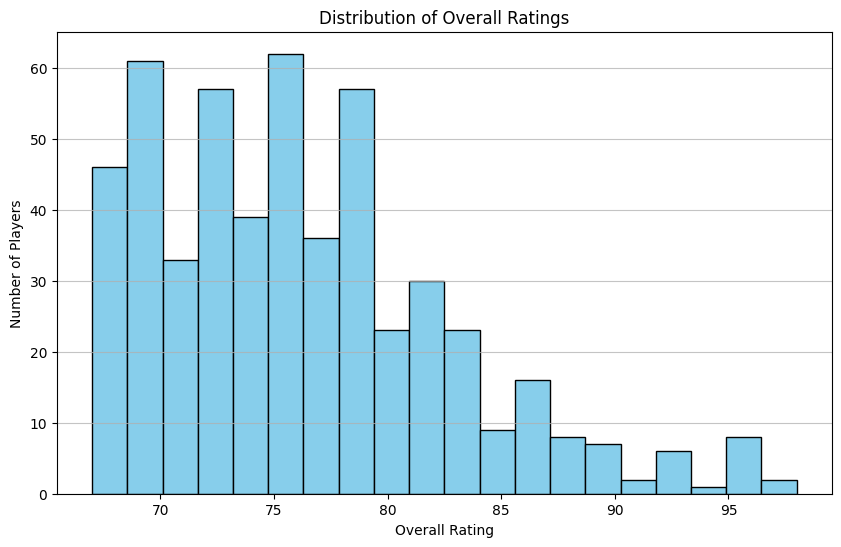

In [139]:
# Create a histogram of player overalls
plt.figure(figsize=(10, 6))
# Adjust bins
plt.hist(nba_data['overall'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.title('Distribution of Overall Ratings')
# Gridlines for y-axis only
plt.grid(axis='y', alpha=0.75)
plt.show()


# Total Attributes vs Overall

In [12]:
## Pearson's correlation coefficient
corr=scipy.stats.pearsonr(total_attributes, overall)
print("Correlation Score:",corr[0])
## Creating a linear regression model
linear_model=scipy.stats.linregress(total_attributes, overall)
print(linear_model)
slope= linear_model.slope
intercept= linear_model.intercept
linear_fit= slope * total_attributes + intercept

Correlation Score: 0.91158253069094
LinregressResult(slope=0.03029313645727438, intercept=1.6213386799027347, rvalue=0.9115825306909393, pvalue=1.995539756715824e-204, stderr=0.0005968265992512018, intercept_stderr=1.4752424516807954)


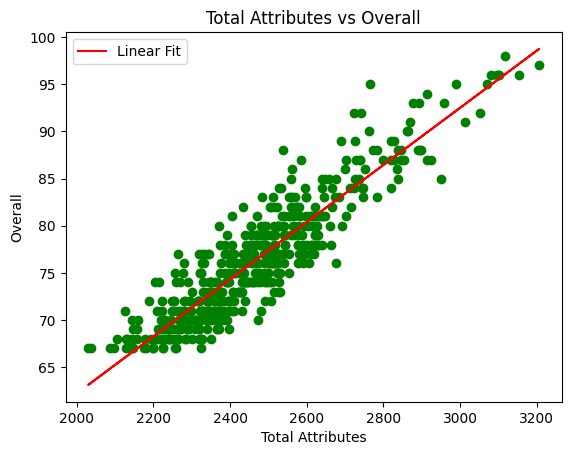

In [13]:
## create scatter plot of total attributes and overall
plt.scatter(total_attributes, overall,c="green")
## Label the data
plt.xlabel("Total Attributes")
plt.ylabel("Overall")
plt.title("Total Attributes vs Overall")
## Plot the linear regression
plt.plot(total_attributes, linear_fit, label="Linear Fit", color="red")
plt.legend()

# Correlation

In [44]:
## this section requires the non numerical values to be dropped
## look at all the correlation scores for the columns in the data
corr_scores = nba_data.corr(numeric_only=True)
print(corr_scores)
## Way to hard to anaylze so find another way

                       Unnamed: 0    jersey  height_cm  weight_lbs  weight_kg  \
Unnamed: 0               1.000000  0.034750   0.051753    0.059806   0.057966   
jersey                   0.034750  1.000000   0.155383    0.185294   0.185190   
height_cm                0.051753  0.155383   1.000000    0.694876   0.694528   
weight_lbs               0.059806  0.185294   0.694876    1.000000   0.999626   
weight_kg                0.057966  0.185190   0.694528    0.999626   1.000000   
wingspan_cm              0.066831  0.122622   0.850931    0.657007   0.656348   
season_salary           -0.011921 -0.098485   0.038247    0.128073   0.128415   
years_in_the_nba        -0.003730  0.046058  -0.013181    0.225882   0.223006   
overall                 -0.019752 -0.151317   0.082686    0.139923   0.140517   
group_outside_scoring   -0.025153 -0.142943  -0.225003   -0.166260  -0.165094   
close_shot              -0.061342 -0.086299   0.056392    0.159452   0.158038   
mid_range_shot          -0.0

([<matplotlib.axis.YTick at 0x7c042e36d9c0>,
 [Text(0, 0, 'Unnamed: 0'),
  Text(0, 1, 'jersey'),
  Text(0, 2, 'height_cm'),
  Text(0, 3, 'weight_lbs'),
  Text(0, 4, 'weight_kg'),
  Text(0, 5, 'wingspan_cm'),
  Text(0, 6, 'season_salary'),
  Text(0, 7, 'years_in_the_nba'),
  Text(0, 8, 'overall'),
  Text(0, 9, 'group_outside_scoring'),
  Text(0, 10, 'close_shot'),
  Text(0, 11, 'mid_range_shot'),
  Text(0, 12, 'three_point_shot'),
  Text(0, 13, 'free_throw'),
  Text(0, 14, 'shot_iq'),
  Text(0, 15, 'offensive_consistency'),
  Text(0, 16, 'group_athleticism'),
  Text(0, 17, 'speed'),
  Text(0, 18, 'agility'),
  Text(0, 19, 'strength'),
  Text(0, 20, 'vertical'),
  Text(0, 21, 'stamina'),
  Text(0, 22, 'hustle'),
  Text(0, 23, 'overall_durability'),
  Text(0, 24, 'group_inside_scoring'),
  Text(0, 25, 'layup'),
  Text(0, 26, 'standing_dunk'),
  Text(0, 27, 'driving_dunk'),
  Text(0, 28, 'post_hook'),
  Text(0, 29, 'post_fade'),
  Text(0, 30, 'post_control'),
  Text(0, 31, 'draw_foul'),
  

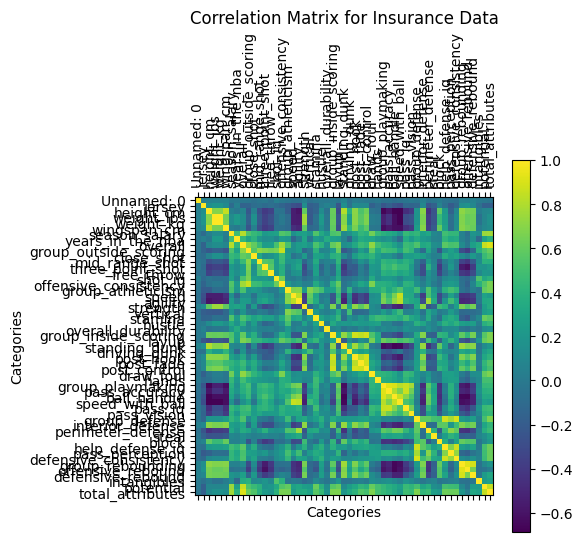

In [45]:
## set up a correlation matrix for the NBA data
plt.matshow(corr_scores)
plt.xlabel("Categories")
plt.ylabel("Categories")
plt.title("Correlation Matrix for NBA Data")
plt.colorbar()
num_labels = len(corr_scores.index)
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index, rotation=0)
## way to clumped and to much data

In [146]:
# Calculate the correlation between 'overall' and other numerical columns
correlations = nba_data.corr()['overall'].drop('overall')

# Exclude 'total_attributes' and 'potential' and 'season_salary'
correlations = correlations.drop(['total_attributes', 'potential','season_salary'])

# Find the column with the highest absolute correlation
most_correlated_column = correlations.abs().idxmax()

print(f"The numerical column most correlated with 'overall' (excluding 'total_attributes' and 'potential' and 'season_salary') is:")
print(most_correlated_column)
print(f"Correlation value: {correlations[most_correlated_column]}")

The numerical column most correlated with 'overall' (excluding 'total_attributes' and 'potential' and 'season_salary') is:
offensive_consistency
Correlation value: 0.7577326451425273


In [11]:
## set up a contingency table
contingency_table = pd.crosstab(nba_data['offensive_consistency'], nba_data['overall'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("There is a significant corrilation between offensive consistency and overall because p < 0.05")

Chi-squared statistic: 998.2758817741019
P-value: 4.995712985451448e-41
Degrees of freedom: 465
There is a significant corrilation between offensive consistency and overall because p < 0.05


In [29]:
## Pearson's correlation coefficient
corr=scipy.stats.pearsonr(offensive_consistency, overall)
print("Correlation Score:",corr[0])
## Creating a linear regression model
linear_model=scipy.stats.linregress(offensive_consistency, overall)
print(linear_model)
slope= linear_model.slope
intercept= linear_model.intercept
linear_fit= slope * offensive_consistency + intercept

Correlation Score: 0.7577326451425276
LinregressResult(slope=0.2443544944817419, intercept=60.06544966442563, rvalue=0.7577326451425273, pvalue=3.348440884032007e-99, stderr=0.009193111931752186, intercept_stderr=0.6366659204074068)


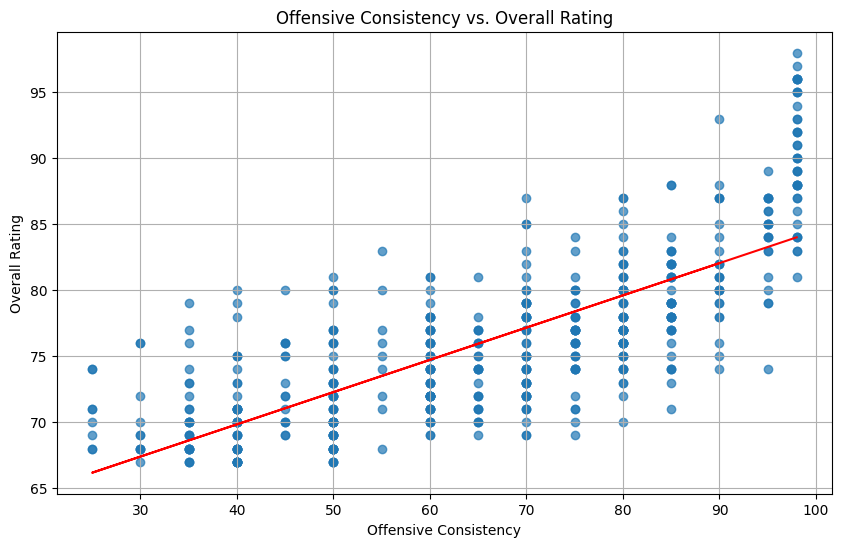

In [30]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(offensive_consistency, overall, alpha=0.7)  # alpha for better visualization if many points overlap
plt.xlabel("Offensive Consistency")
plt.ylabel("Overall Rating")
plt.title("Offensive Consistency vs. Overall Rating")
plt.plot(offensive_consistency, linear_fit, label="Linear Fit", color="red")
plt.grid(True)
plt.show()

# Machine Learning

In [21]:
## give the variables values
y=nba_data.overall
X=nba_data[['years_in_the_nba','overall','potential','offensive_consistency']]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20)

In [22]:
## find the length of the varibales and data
print(len(y_train))
print(len(nba_data)*0.80)

420
420.8


In [23]:
## print the trained model
print(X_train)

     years_in_the_nba  overall  potential  offensive_consistency
488               1.0       68         77                     35
142               1.0       69         77                     35
477               1.0       71         83                     40
200               3.0       74         78                     60
285              16.0       86         86                     80
..                ...      ...        ...                    ...
13                1.0       67         71                     50
72                6.0       74         76                     85
446               4.0       75         75                     80
296              10.0       91         91                     98
24                7.0       80         84                     90

[420 rows x 4 columns]


In [26]:
## .fit means to train the model
classifier=KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
## predict the test
prediction=classifier.predict(X_test)

In [28]:
## print the accuary of the prediction
accuracy=accuracy_score(y_test,prediction)
print(accuracy*100,"%")

32.075471698113205 %


# Team Pie Chart

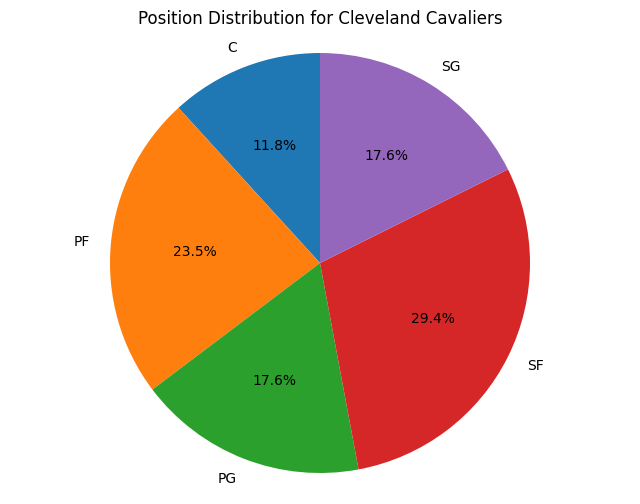

In [135]:
## use the groupby function to group the data by teams
team_position_counts = nba_data.groupby('team')['position_1'].value_counts().unstack(fill_value=0)
# Select a team to plot (example: "Boston Celtics")
team_name = "Cleveland Cavaliers"
team_data = team_position_counts.loc[team_name]
# Adjust the figure size
plt.figure(figsize=(8, 6))
plt.pie(team_data, labels=team_data.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Position Distribution for {team_name}')
plt.axis('equal')
plt.show()


# Height vs Weight

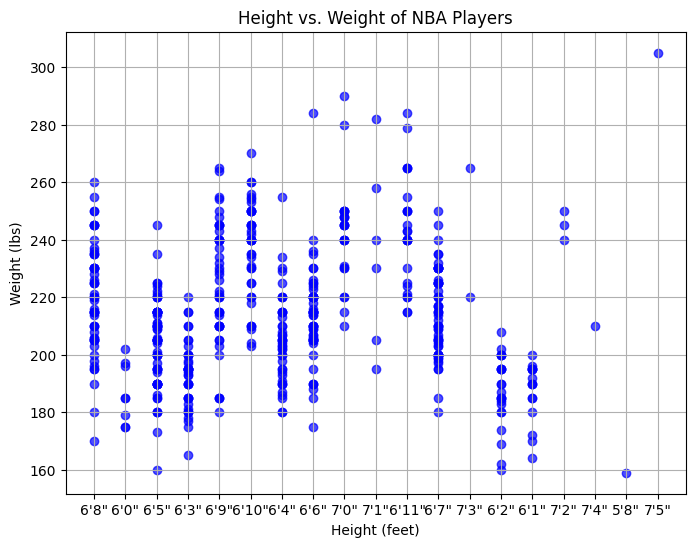

In [137]:
# Create a scatter plot of height vs. weight
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(nba_data['height_feet'], nba_data['weight_lbs'], c='blue', alpha=0.7) # alpha for transparency
plt.xlabel('Height (feet)')
plt.ylabel('Weight (lbs)')
plt.title('Height vs. Weight of NBA Players')
plt.grid(True) # Add gridlines for better readability
plt.show()


# Position Overall Distribution

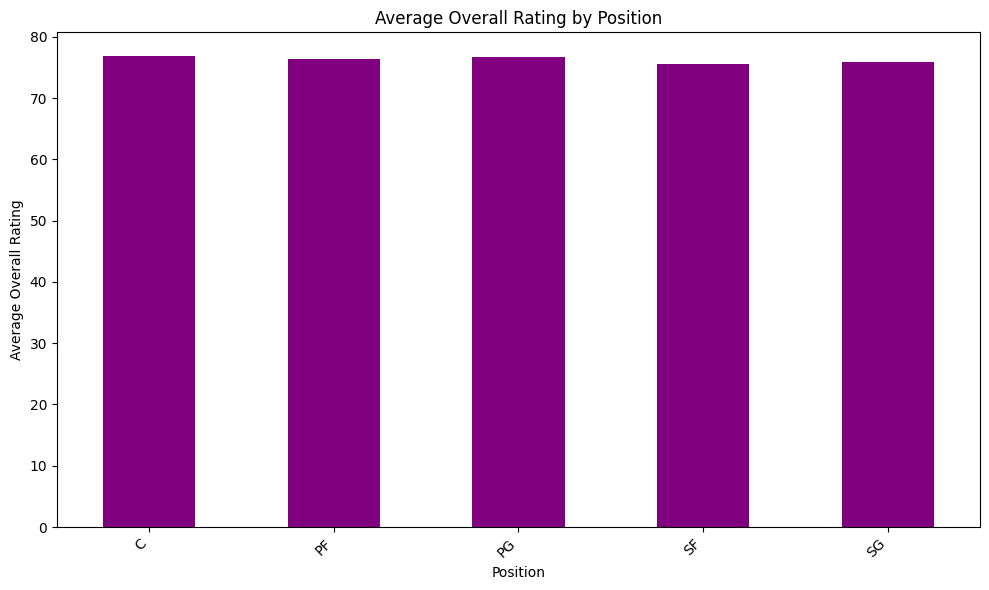

In [136]:
# Create a bar plot of average overall by position (if position data is available)
avg_overall_by_position = nba_data.groupby('position_1')['overall'].mean()
plt.figure(figsize=(10, 6))
avg_overall_by_position.plot(kind='bar', color='purple')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Position')
# Rotate x-axis labels so they are readable
plt.xticks(rotation=45, ha='right')
# Rotate x-axis labels so they are readable
plt.tight_layout()
plt.show()